In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

# 필터의 가중치 

- 입력 이미지의 2차원 영역에 적용되어 필터가 찾는 어떤 특징을 크게 두드러지게 표현하는 역할 
    - 예) 물건의 테두리같은 특징적인 부분의 가중치는 높고 그 외 영역은 가중치가 낮게 

In [2]:
# 저장해둔 cnn모델 불러오기 (흑백 이미지 분류)
model = keras.models.load_model('./model/best-cnn-model.h5')

# 모델 층 확인 
model.layers

In [3]:
# 첫 번째 합성곱 층의 가중치 확인 
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
# 커널 각 칸의 가중치 --> 32개 (3,3,1,32)
# 각 커널의 절편 (32,)

(3, 3, 1, 32) (32,)


In [4]:
conv.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 8.37899894e-02,  1.93465836e-02, -2.31691882e-01,
           -2.34613437e-02, -1.31108845e-02, -2.23353714e-01,
            1.17701650e-01, -2.21479446e-01, -1.99067533e-01,
            3.08012660e-03, -1.68770552e-02, -2.78407902e-01,
           -2.60371327e-01,  1.38951540e-01,  2.96973914e-01,
           -3.68582197e-02,  5.13084158e-02, -1.87145919e-01,
            4.75437827e-02, -1.00368597e-01, -1.38743269e+00,
            1.00796089e-01, -2.88396329e-01, -1.75883055e-01,
           -8.09892416e-02,  1.06047265e-01, -7.08374083e-02,
           -1.33149788e-01,  2.90899109e-02,  4.54157032e-02,
           -1.31522313e-01, -6.82775900e-02]],
 
         [[-8.57927948e-02,  2.17443511e-01, -1.26258761e-01,
           -1.22424704e-03, -2.01932877e-01,  1.02423042e-01,
           -2.60457933e-01, -1.69760734e-01, -2.19420064e-02,
            2.20749646e-01, -3.16007823e-01, -1.83050022e-01,
         

- conv.weights[0]
    - 커널 각 칸의 가중치
    - 가중치의 크기 
        - 커널 크기 : (3, 3, 1)
        - 필터 개수 : 32
        
- conv.weights[1]
    - 절편
    - 절편 개수 = 필터 개수 

In [5]:
# 원활한 계산을 위해 넘파이 배열로 변환 
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.032720864 0.2714608


In [7]:
conv_weights.reshape(-1,1).shape

(288, 1)

In [8]:
conv_weights.reshape(-1,1)

array([[ 8.37899894e-02],
       [ 1.93465836e-02],
       [-2.31691882e-01],
       [-2.34613437e-02],
       [-1.31108845e-02],
       [-2.23353714e-01],
       [ 1.17701650e-01],
       [-2.21479446e-01],
       [-1.99067533e-01],
       [ 3.08012660e-03],
       [-1.68770552e-02],
       [-2.78407902e-01],
       [-2.60371327e-01],
       [ 1.38951540e-01],
       [ 2.96973914e-01],
       [-3.68582197e-02],
       [ 5.13084158e-02],
       [-1.87145919e-01],
       [ 4.75437827e-02],
       [-1.00368597e-01],
       [-1.38743269e+00],
       [ 1.00796089e-01],
       [-2.88396329e-01],
       [-1.75883055e-01],
       [-8.09892416e-02],
       [ 1.06047265e-01],
       [-7.08374083e-02],
       [-1.33149788e-01],
       [ 2.90899109e-02],
       [ 4.54157032e-02],
       [-1.31522313e-01],
       [-6.82775900e-02],
       [-8.57927948e-02],
       [ 2.17443511e-01],
       [-1.26258761e-01],
       [-1.22424704e-03],
       [-2.01932877e-01],
       [ 1.02423042e-01],
       [-2.6

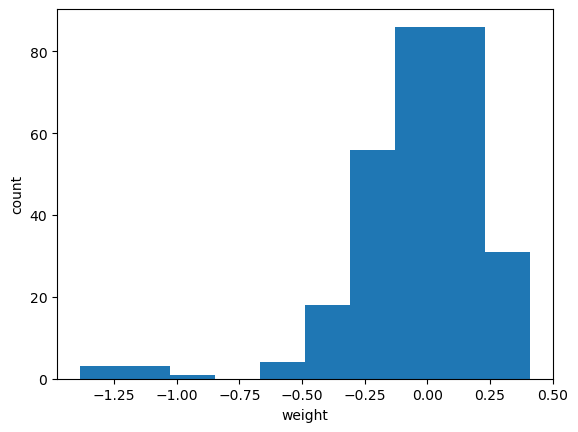

In [6]:
# 가중치 히스토그램 
plt.figure()

plt.hist(conv_weights.reshape(-1,1)) # (288, 1)
# hist 함수는 데이터를 1차원 배열로 전달해야함.

plt.xlabel('weight')
plt.ylabel('count')

plt.show()

- 학습이 잘되면, 가중치가 표준정규분포에 가까운 모양을 띔.
    - 지금은 왼쪽 꼬리가 있음. 
- 초기값은 일자로 다 똑같음. 
- 가중치가 마이너스 된 것은 볼필요 없다 해서 날려버린 것 
- 가중치 높은 것은 집중해야 하는 애들 

- 각각의 도장들 확인 
- 초기 가중치가 어떻게 생겼는지 확인

In [9]:
conv_weights[:,:,0,0] # (3,3)
# 0번째 커널의 가중치의 모습 

array([[ 0.08378999, -0.08579279,  0.0505555 ],
       [-0.21525013, -0.1559901 ,  0.321579  ],
       [-0.07556138,  0.04845103,  0.12703367]], dtype=float32)

In [10]:
conv_weights[:,:,0,20]

array([[-1.3874327 , -1.3727305 , -0.43253228],
       [-1.1825162 , -1.222885  , -0.46684125],
       [-0.11782922, -0.0827718 ,  0.39682344]], dtype=float32)

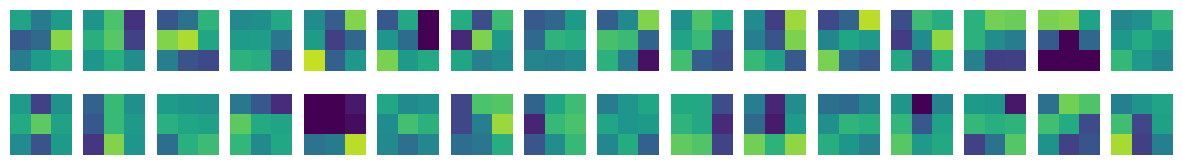

In [7]:
# 32개의 커널 모두 시각화
fig, axs = plt.subplots(2,16,figsize=(15,2))

for i in range(2):
    for j in range(16):
        # conv_weights : (3,3,1,32)
        # conv_weights[:,:,0,0] ~ [:,:,0,31]
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j],
                       vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
        
plt.show()

- 밝은 부분이 높은 값 
    - 가중치가 높은 영역에 이미지가 겹치면 크게 활성화됨. 
        - 예) 가로로 한 줄의 가중치가 높다면 가로로 놓인 직선을 만났을 때 크게 활성화 
        
- i : 행 인덱스 (0-1)
- j : 열 인덱스 (0-15)
    - conv_weights[:,:,0,0] 부터 [:,:,0,31] 까지 출력 
    - 0 번째 채널, 0 ~ 31번째 커널

- imshow()
    - 배열의 최대값과 최소값으로 픽셀 강도 표현 
        - 배열의 최대값은 가장 밝은 색으로 
        - 배열의 최소값은 가장 어두운 색으로
    - vmax, vmin
        - 컬러맵으로 표현할 색의 범위 지정 

- 정확도 90 넘어가는 잘 학습된 커널들
- 가로 특징, n자 특징 등을 포착하는 커널들

In [8]:
conv_weights

array([[[[ 8.37899894e-02,  1.93465836e-02, -2.31691882e-01,
          -2.34613437e-02, -1.31108845e-02, -2.23353714e-01,
           1.17701650e-01, -2.21479446e-01, -1.99067533e-01,
           3.08012660e-03, -1.68770552e-02, -2.78407902e-01,
          -2.60371327e-01,  1.38951540e-01,  2.96973914e-01,
          -3.68582197e-02,  5.13084158e-02, -1.87145919e-01,
           4.75437827e-02, -1.00368597e-01, -1.38743269e+00,
           1.00796089e-01, -2.88396329e-01, -1.75883055e-01,
          -8.09892416e-02,  1.06047265e-01, -7.08374083e-02,
          -1.33149788e-01,  2.90899109e-02,  4.54157032e-02,
          -1.31522313e-01, -6.82775900e-02]],

        [[-8.57927948e-02,  2.17443511e-01, -1.26258761e-01,
          -1.22424704e-03, -2.01932877e-01,  1.02423042e-01,
          -2.60457933e-01, -1.69760734e-01, -2.19420064e-02,
           2.20749646e-01, -3.16007823e-01, -1.83050022e-01,
           1.83678299e-01,  2.91565567e-01,  3.16991925e-01,
           7.78823439e-03, -3.03398013

In [9]:
conv_weights.shape
# 너비, 높이, 채널 차원, 커널 

(3, 3, 1, 32)

# 훈련하지 않은 빈 합성곱 신경망과 비교 

In [13]:
not_trained_model = keras.Sequential()
not_trained_model.add(keras.layers.Conv2D(32, kernel_size=3,
                                         activation='relu',
                                         padding='same',
                                         input_shape=(28,28,1)))

# 훈련하지 않은 빈 합성곱 층의 가중치 저장 
not_trained_conv = not_trained_model.layers[0]
print(not_trained_conv.weights[0].shape)
print(not_trained_conv.weights)
# not_trained_conv.weights[1]는 절편 

(3, 3, 1, 32)
[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.06760715, -0.02423579, -0.07525603, -0.03449267,
           0.03442334, -0.00444511, -0.07992516,  0.13323648,
           0.04578902,  0.09367001, -0.04502923,  0.10926385,
          -0.05791747, -0.02298006,  0.12853993,  0.0181265 ,
          -0.0816525 ,  0.13182403,  0.08510938, -0.06080904,
          -0.08147445,  0.0748584 , -0.07663684, -0.05604997,
           0.10003577,  0.12110664, -0.11625127, -0.08523931,
           0.04420777,  0.03317475, -0.05675432,  0.09596743]],

        [[ 0.06745374, -0.13547207,  0.01706333, -0.02842748,
          -0.00359951,  0.04891387, -0.11723228,  0.09986475,
          -0.06621224, -0.09054708,  0.06880327,  0.08190984,
          -0.02563269, -0.07440946, -0.02814693,  0.09114   ,
           0.05886205,  0.05783217, -0.07892338,  0.06258871,
          -0.12859932, -0.14190474, -0.08987598,  0.08497241,
          -0.04727101, -0.04859347,  0.01

In [14]:
not_trained_weights = not_trained_conv.weights[0].numpy()
print(not_trained_weights.mean(), not_trained_weights.std())
# -0.032720864 0.2714608 이것과 비교
# 훈련된 모델의 커널 가중치의 표준편차가 더 높음 (위아래가 있음)

0.002218207 0.08266379


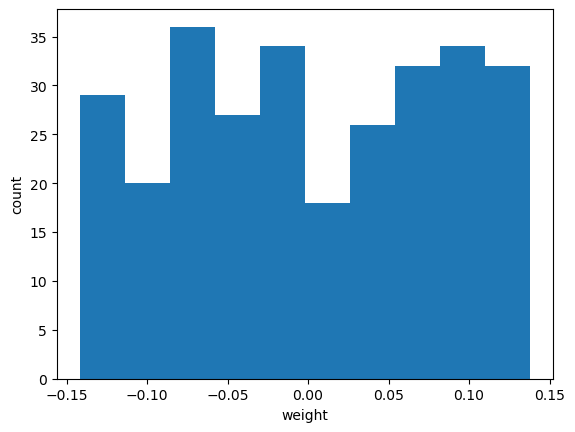

In [15]:
# 훈련 전의 합성곱 층 히스토그램 
plt.figure()

plt.hist(not_trained_weights.reshape(-1,1))

plt.xlabel('weight')
plt.ylabel('count')

plt.show()

- 균등분포
    - 각각이 같은(비슷한) 확률값 
    - 훈련 후는 "종모양"
    
- 대부분의 가중치가 -0.15 부터 0.15 까지 고르게 분포 
    - 텐서플로에서 가중치를 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문

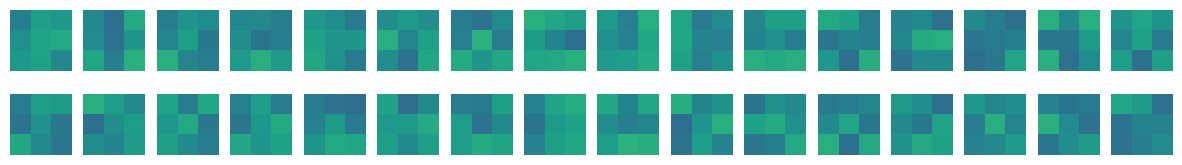

In [16]:
fig, axs = plt.subplots(2,16,figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(not_trained_weights[:,:,0,i*16+j],
                       vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
        
plt.show()

- 훈련된 모델에 비해 패턴이 뚜렷하지 않음.

# 케라스의 함수형 API

- Sequential 클래스 : 층을 차례대로 쌓은 단순한 모델 구성 
- 복잡한 모델은 구성하기 힘들기 때문에 합수형 API(functional API)를 사용 
    - 케라스의 Model 클래스를 사용하여 모델을 생성 
    - layers 객체를 함수처럼 호출 

## 함수형 API로 다층 신경망 모델 구현 예제 

In [17]:
# 1. 입력층 생성 
inputs = keras.Input(shape=(784,))

- Sequential 클래스는 InputLayer 클래스를 자동으로 추가하고 호출 
- Model 클래스는 입력층을 수동으로 만들어서 호출해야함. 

In [18]:
# 2. 은닉층과 출력층 객체 생성 
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [19]:
# 3. 은닉층 호출 
hidden = dense1(inputs)

- inputs를 Dense1 층에 통과시킨 후 출력값 hidden을 만드는 구조 생성 

In [20]:
# 4. 출력층 호출 
outputs = dense2(hidden)

In [21]:
# 5. Model 클래스로 inputs와 outputs 연결 
test_model = keras.Model(inputs, outputs)

test_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


# 합성곱 신경망 모델 특성맵 시각화
- 함수형 API를 이용해 첫번째 합성곱 층의 출력(특성맵) 시각화

In [11]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [12]:
keras.Input(shape=(None, 28, 28, 1))

<KerasTensor: shape=(None, None, 28, 28, 1) dtype=float32 (created by layer 'input_1')>

In [13]:
model.layers[0].output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d')>

In [22]:
# 합성곱 층과 입력층을 함수형 API로 연결 
conv_acti = keras.Model(model.input, model.layers[0].output)

conv_acti.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


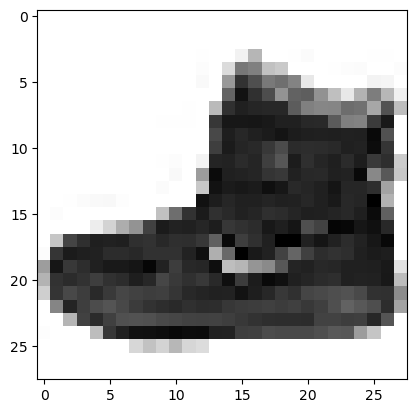

In [24]:
# 데이터 준비 
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

plt.figure()
plt.imshow(x_train[0], cmap='gray_r')
plt.show()

In [25]:
# 위의 데이터를 첫 번째 합성곱 층에 통과
inputs = x_train[[0]].reshape(-1, 28, 28, 1) / 255

feature_maps = conv_acti.predict(inputs)

print(feature_maps.shape)
# (배치 크기, 너비, 높이, 채널)

1/1 [==============================] - 0s 248ms/step
(1, 28, 28, 32)


In [26]:
feature_maps

array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0. 

- 세임 패딩과 32개의 필터를 사용한 합성곱 층의 출력이기 때문에 (28, 28, 32)
- 첫 번째 차원은 배치 차원 
    - 샘플 하나만 입력했기 때문에 1

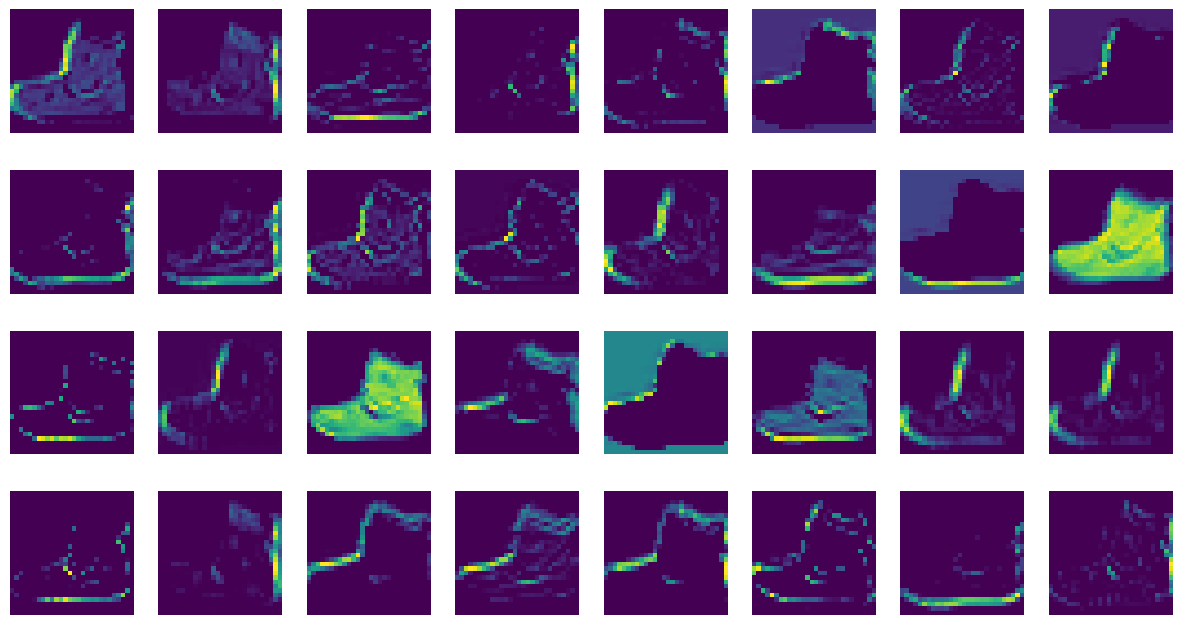

In [27]:
# 32개의 특성맵 시각화 
fig, axs = plt.subplots(4,8,figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

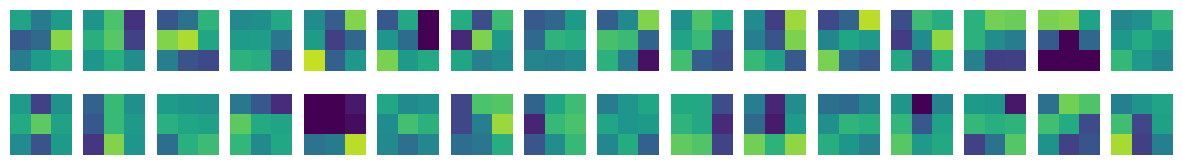

In [7]:
# 32개의 커널 모두 시각화
fig, axs = plt.subplots(2,16,figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j],
                       vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
        
plt.show()

- 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분들 시각화
    - 필터가 수직선을 감지한다면 수직선 부분이 강하게 활성화 
    - 전체적으로 모두 감지하는 필터는 아이템의 전체 활성화 
    - 전체적으로 음수값인 필터는 배경과 같은 0에 가까운 값과 곱해지면 작은 음수, 큰 수가 곱해지면 큰 음수가 됨. 
        - 배경을 잘 활성화함. 

In [28]:
# 두 번째 합성곱 층의 특성맵 확인 
conv2_acti = keras.Model(model.input, model.layers[2].output)

feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)

1/1 [==============================] - 0s 67ms/step
(1, 14, 14, 64)


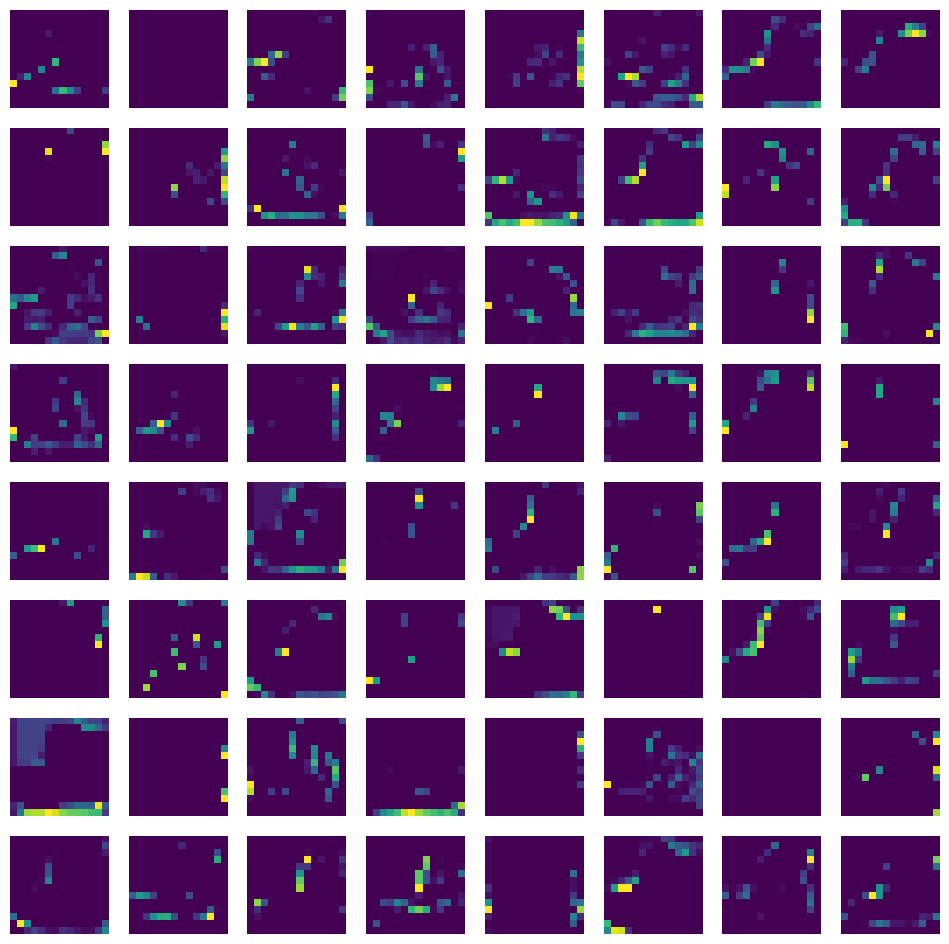

In [29]:
fig, axs = plt.subplots(8,8,figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

# 맥스풀링층을 거쳐서 (14,14) 로 더 해상도가 낮아진 모습 
# 동시에 두 번째 합성곱 층 거치며 더욱 특징이 추상화됨.

- 32개의 특성 종합해서 64개의 새로운 정보 
- 좀더 고차원적, 추상적 정보를 학습한 것 

<br>

- 특성맵을 시각적으로 이해하기 난해 
    - 합성곱 층을 많이 쌓을수록 심해짐 
    - 앞부분의 합성곱 층은 이미지의 시각적 정보 감지 
    - 뒷부분의 합성곱 층은 앞쪽에서 감지한 시각 정보를 바탕으로 추상적인 정보 학습

## 풀링 결과물과 비교 

In [30]:
pool_model = keras.Model(model.input, model.layers[1].output)

pool_feature_maps = pool_model.predict(inputs)
print(pool_feature_maps.shape)

1/1 [==============================] - 0s 50ms/step
(1, 14, 14, 32)


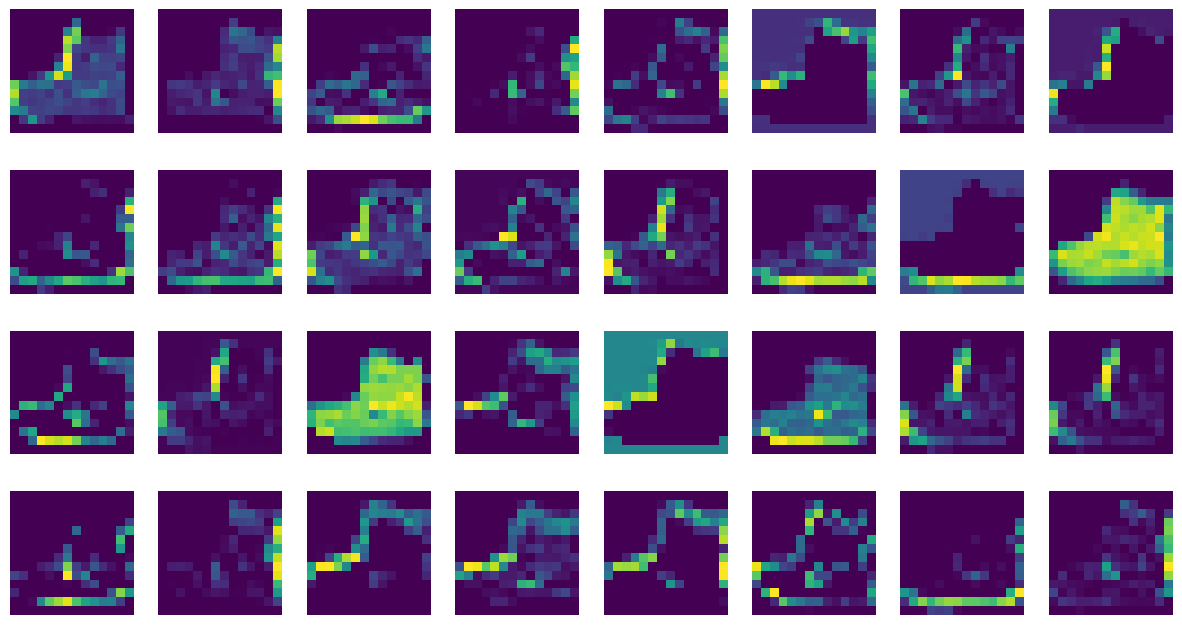

In [31]:
fig, axs = plt.subplots(4,8,figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i,j].imshow(pool_feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

- 맥스풀링은 특징은 최대한 살리면서 화질만 낮춘 것(크기 줄인것)